# Japanese Grand Prix Analysis - 2024 (Race)

In [4]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from matplotlib.collections import LineCollection
import matplotlib as mpl

import numpy as np
import pandas as pd

In [2]:
ff1.Cache.enable_cache('../cache')

In [3]:
YEAR = 2024
RACE = 4
SESSION = 'R'

session_race = ff1.get_session(YEAR, RACE, SESSION)
weekend = session_race.event
session_race.load()

core           INFO 	Loading data for Japanese Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\c

<h3 style='color: red;'>Max Verstappen Fastest Lap during the 2024 Japanese Grand Prix</h3>

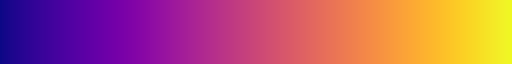

In [6]:
colormap = mpl.cm.plasma

In [10]:
VER_lap = session_race.laps.pick_driver('VER')

Ver_x, Ver_y = VER_lap.telemetry['X'], VER_lap.telemetry['Y']

C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the v

In [13]:
color = VER_lap.telemetry['Speed']

In [20]:
points = np.array([Ver_x, Ver_y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

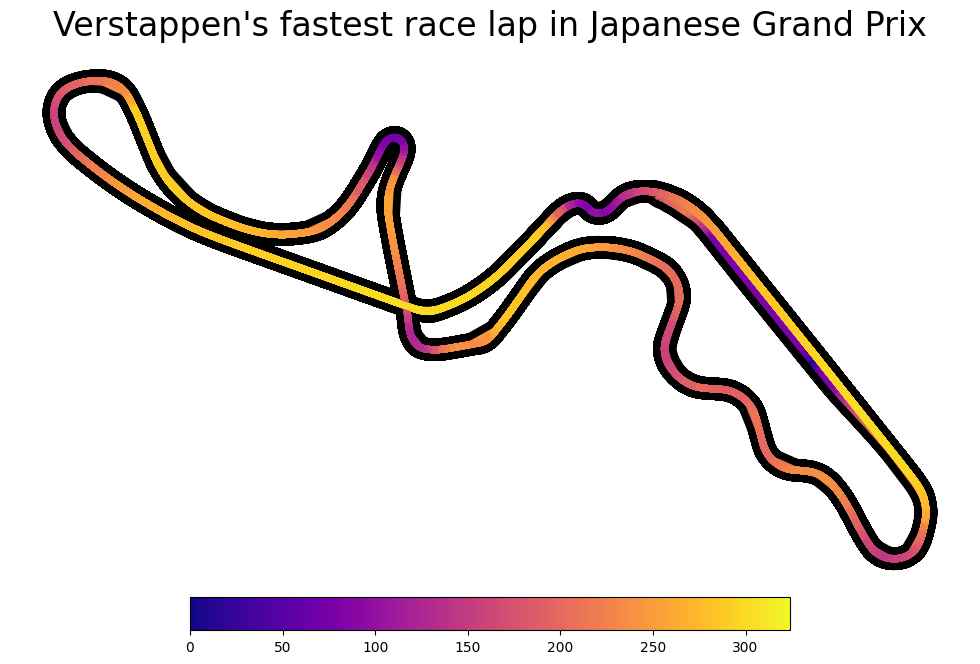

In [29]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f"Verstappen's fastest race lap in {weekend['EventName']}", size=24, y=0.97)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

ax.plot(VER_lap.telemetry['X'], VER_lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)

norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

lc.set_array(color)

line = ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")

plt.show()

In [37]:
VER_lap = session_race.laps.pick_driver('VER').pick_quicklaps().reset_index()
VER_lap['LapTime'] = VER_lap['LapTime'].dt.total_seconds().astype(float)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_20144\552069081.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(data=VER_lap,


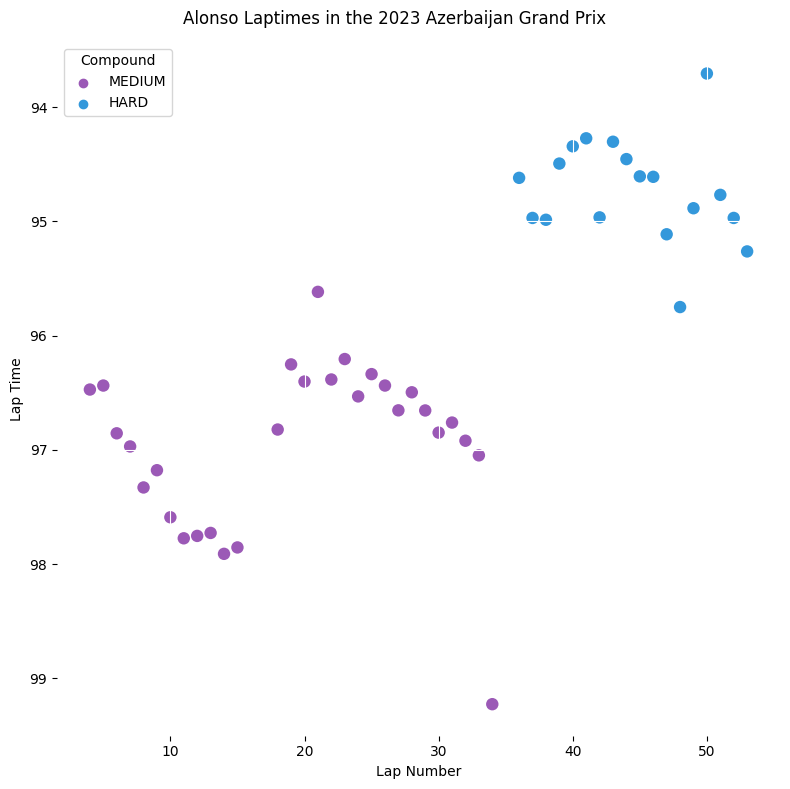

In [40]:
fig, ax = plt.subplots(figsize=(8,8))

import seaborn as sns

sns.scatterplot(data=VER_lap,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                # Marker colors corresponding to the compounds used in the race
                palette=["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"],
                s=80,
                linewidth=0,
                legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Alonso Laptimes in the 2023 Azerbaijan Grand Prix")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()